In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mp_key = "zwe7ZzatCkKkvB6PUpwVmS0nGdBcJr1R"
mp_id = "mp-1569"

In [3]:
with MPRester(mp_key) as m:
    el_bs = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Analyse de la structure de bandes électroniques

# 1) Bande interdite

In [4]:
energie = el_bs.get_band_gap()["energy"]
print("La largeur de la bande interdite vaut :",energie,"eV")

La largeur de la bande interdite vaut : 1.1636999999999995 eV


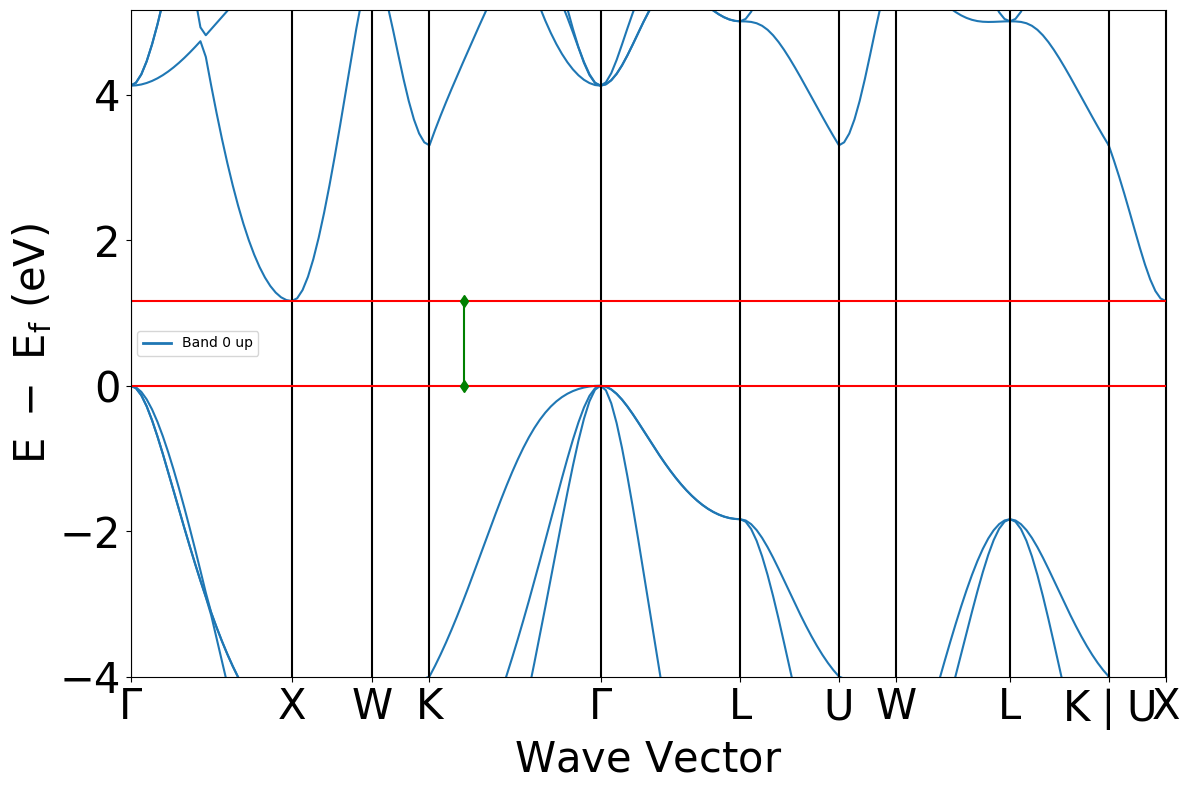

In [5]:
BSPlotter(el_bs).get_plot()

x1, y1 = [-0.1, 9.5], [0, 0]
x2, y2 = [-0.1, 9.5], [1.1636999999999995, 1.1636999999999995]
x3, y3 = [3,3], [0,1.1636999999999995]

plt.plot(x1, y1, x2, y2, color = 'r', marker = 'o')
plt.plot(x3, y3, color = 'g', marker = 'd')

plt.show()

La bande interdite est marquée par les deux lignes rouges sur le graphique ci-dessus, sa largeur par la ligne verte.

# 2) Direction de dispersion

Pour trouver les minimum et maximum de dispersion, il faut calculer la dérivée de l'énergie par rapport au vecteur d'onde.

On calcule donc delta(E)/delta(k) sur chaque chemin pour récupèrer les minima et maxima pour avoir les dispersions minimales et maxiamles.

In [27]:
fig_el_bs = get_plot_bs(el_bs, plot_range=[-7,7])
fig_el_bs.show()

La dernière bande de valence est donc la 6ème et la première bande de conduction est la 7ème.

In [7]:
data = BSPlotter(el_bs).bs_plot_data()

dEdk_v = []
dEdk_c = []

for i in range(len(data['distances'])) :  
    dk = data['distances'][i][0]-data['distances'][i][-1]
    dE_v = data["energy"]['1'][i][5][0]-data["energy"]['1'][i][5][-1]
    dE_c = data["energy"]['1'][i][6][0]-data["energy"]['1'][i][6][-1]   
    dEdk_v.append(abs(dE_v/dk))
    dEdk_c.append(abs(dE_c/dk))

print("Dispersion maximale pour la dernière bande de valence : de k =", data['distances'][dEdk_v.index(max(dEdk_v))][0],"à",data['distances'][dEdk_v.index(max(dEdk_v))][-1],
      "1/A et de E =", data['energy']['1'][dEdk_v.index(max(dEdk_v))][5][0],"à",data['energy']['1'][dEdk_v.index(max(dEdk_v))][5][-1],"eV")
print("Dispersion minimale pour la dernière bande de valence : de k =",data['distances'][dEdk_v.index(min(dEdk_v))][0],"à",
     data['distances'][dEdk_v.index(min(dEdk_v))][-1],"1/A et de E =", data['energy']['1'][dEdk_v.index(min(dEdk_v))][5][0],"à",data['energy']['1'][dEdk_v.index(min(dEdk_v))][5][-1],"eV")
print("Dispersion maximale pour la première bande de conduction : de k =",data['distances'][dEdk_c.index(max(dEdk_c))][0],"à",
     data['distances'][dEdk_c.index(max(dEdk_c))][-1],"1/A et de E =", data['energy']['1'][dEdk_c.index(max(dEdk_c))][6][0],"à",data['energy']['1'][dEdk_c.index(max(dEdk_c))][6][-1],"eV")
print("Dispersion minimale pour la première bande de conduction : de k =",data['distances'][dEdk_c.index(min(dEdk_c))][0],"à",
     data['distances'][dEdk_c.index(min(dEdk_c))][-1],"1/A et de E =", data['energy']['1'][dEdk_c.index(min(dEdk_c))][6][0],"à",data['energy']['1'][dEdk_c.index(min(dEdk_c))][6][-1],"eV")

Dispersion maximale pour la dernière bande de valence : de k = 6.889633122266632 à 7.916084270443221 1/A et de E = -5.91 à -1.835 eV
Dispersion minimale pour la dernière bande de valence : de k = 8.805017040507861 à 9.31824261459619 1/A et de E = -3.9970000000000003 à -4.7388 eV
Dispersion maximale pour la première bande de conduction : de k = 1.4516211348647687 à 2.177431702297153 1/A et de E = 1.1636999999999995 à 5.7233 eV
Dispersion minimale pour la première bande de conduction : de k = 2.6906572763854477 à 4.230333998650411 1/A et de E = 3.3035999999999994 à 4.1236 eV


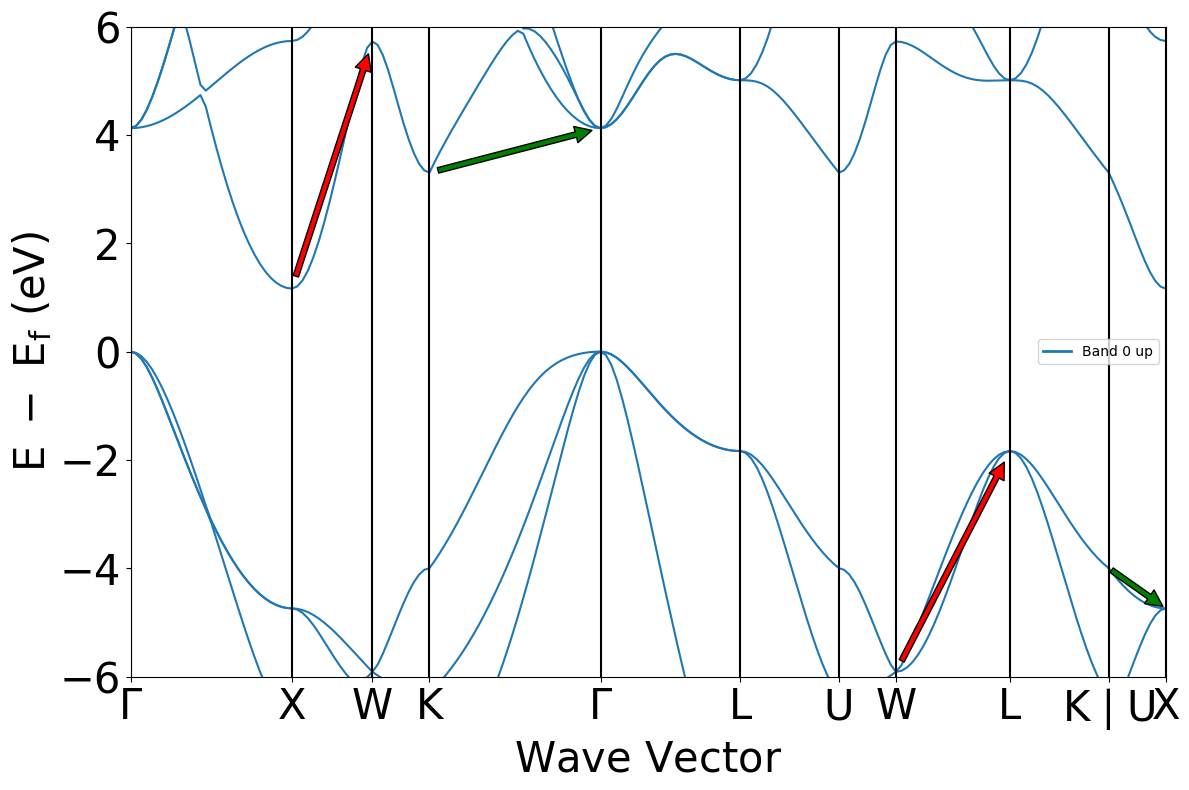

In [8]:
BSPlotter(el_bs).get_plot(ylim=[-6,6])
#Dispersion maximale pour la dernière bande de valence
a1 = (6.889633122266632, -5.91)
a2 = (7.916084270443221, -1.835)
plt.annotate('', xy=a2, xytext=a1, arrowprops=dict(facecolor='red', shrink=0.05))

#Dispersion minimale pour la dernière bande de valence
b1 = (8.805017040507861, -3.9970000000000003)
b2 = (9.31824261459619, -4.7388)
plt.annotate('', xy=b2, xytext=b1, arrowprops=dict(facecolor='green', shrink=0.05))

#Dispersion maximale pour la première bande de conduction
c1 = (1.4516211348647687, 1.1636999999999995)
c2 = (2.177431702297153, 5.7233)
plt.annotate('', xy=c2, xytext=c1, arrowprops=dict(facecolor='red', shrink=0.05))

#Dispersion minimale pour la première bande de conduction
d1 = (2.6906572763854477, 3.3035999999999994)
d2 = (4.230333998650411, 4.1236)
plt.annotate('', xy=d2, xytext=d1, arrowprops=dict(facecolor='green', shrink=0.05))

plt.show()

Les flèches rouges représentent le maximum de dispersion et les flèches vertes le minimum de dispersion.

La dernière bande de valence présente donc le plus de dispersion dans la direction $W-L$ et le moins de dispersion dans la direction $K|U-X$.

La première bande de conduction présente donc le plus de dispersion dans la direction $X-W$ et le moins de dispersion dans la direction $K-\Gamma$.

# 3) Masse effective

Pour trouver la masse effective, on a l'équation suivante:

$$\frac{1}{m^*} = \frac{1}{\hbar^2}\frac{\mathrm d^2}{\mathrm d k^2} \left( E \right)$$
Donc la formule pour la masse effective est :
$$m^* = \frac{\hbar^2}{\frac{\mathrm d^2}{\mathrm d k^2} \left( E \right)}$$

On suppose une dispersion parabolique pour calculer la dérivée seconde de l'énergie qui sera exprimée en eVÅ², donc il faudra convertir les eV en Joules et les Å en mètres pour ensuite appliquer la formule.

# Au sommet de la dernière bande de valence

Parabole d'approximation :  y(k) = -3.981572906036246k² + 33.54337576342906k -70.646546180753
Dérivée seconde :  -7.963145812072492 eVÅ²
Masse effective :  -8.716803298253371e-31 kg


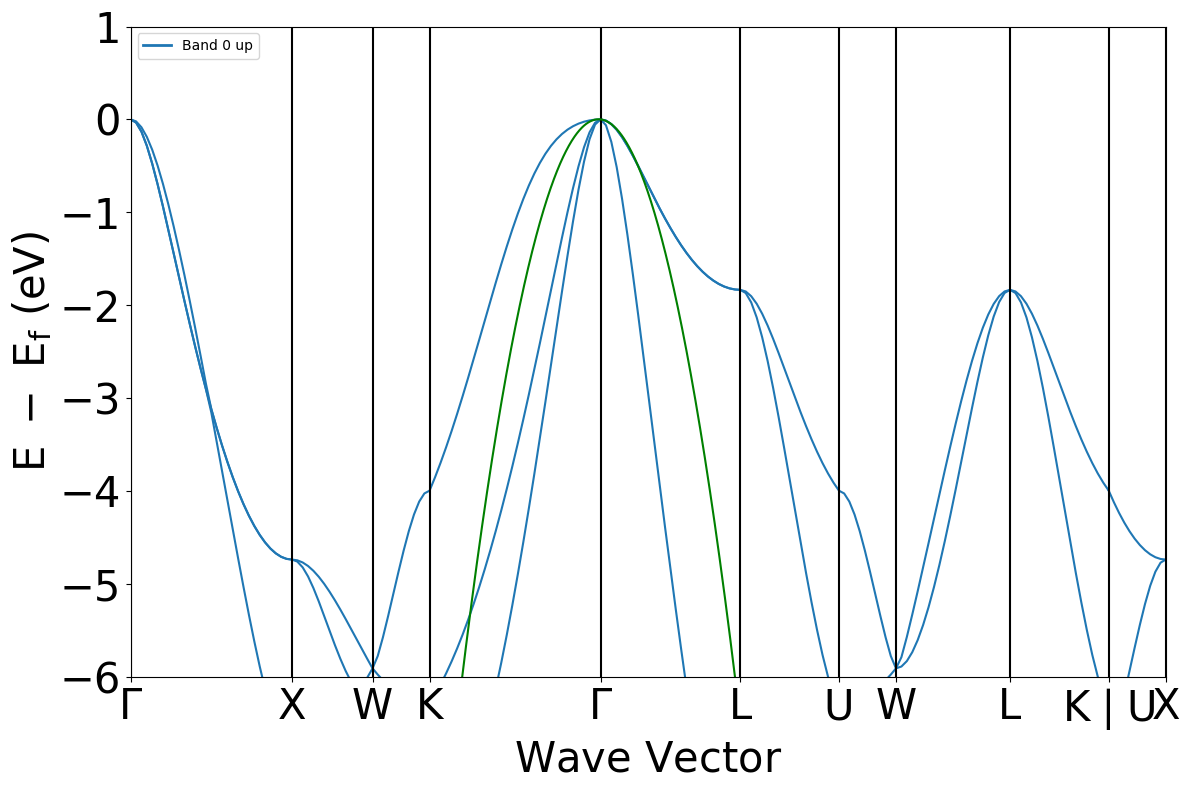

In [42]:
BSPlotter(el_bs).get_plot(ylim=[-6,1])

hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10) 

#Parabole autour du maximum de la bande de valence
k = np.zeros(3)
E = np.zeros(3)
(k[1],E[1]) = data['vbm'][1]
(k[0],E[0]) = (data['distances'][3][-2],data["energy"]['1'][3][5][-2])
(k[2],E[2]) = (data['distances'][4][2],data["energy"]['1'][4][5][2])
a = np.polyfit(k,E,2)

print("Parabole d'approximation : ","y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k "+str(a[2]))
print("Dérivée seconde : ",str(2*a[0])+" eV\u212b\u00b2")
print("Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" kg")

x = np.linspace(data['distances'][3][0],data['distances'][4][-1],1000)
plt.plot(x,np.polyval(a,x),'g')
plt.show()

# A la base de la première bande de conduction

Parabole d'approximation :  y(k) = 12.585398712264855k² + -36.19608547722254k 27.186701187104024
Dérivée seconde :  25.17079742452971 eVÅ²
Masse effective :  2.757686795075502e-31 kg


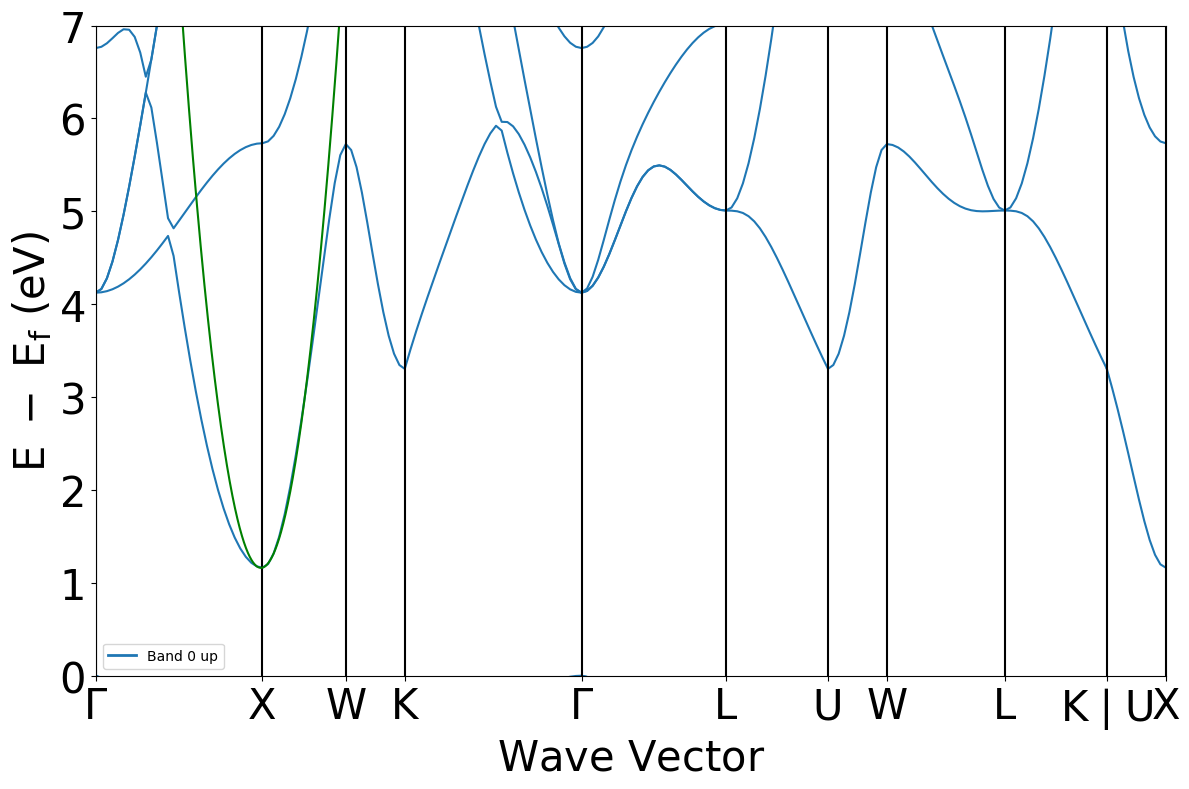

In [41]:
BSPlotter(el_bs).get_plot(ylim=[0,7])

hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10) 

#Parabole autour du minimum de la bande de conduction
k = np.zeros(3)
E = np.zeros(3)
(k[1],E[1]) = data['cbm'][1]
(k[0],E[0]) = (data['distances'][0][-2],data["energy"]['1'][0][6][-2])
(k[2],E[2]) = (data['distances'][1][2],data["energy"]['1'][1][6][2])
a = np.polyfit(k,E,2)

print("Parabole d'approximation : ","y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k "+str(a[2]))
print("Dérivée seconde : ",str(2*a[0])+" eV\u212b\u00b2")
print("Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" kg")

x = np.linspace(data['distances'][0][0],data['distances'][1][-1],1000)
plt.plot(x,np.polyval(a,x),'g')
plt.show()